# Data Processing

In [ ]:
import pandas as pd

In [ ]:
# Lấy dữ liệu cào được để từ Data collection để xử lí
df_merge = pd.read_csv("/content/Data_megre_final.csv")

In [ ]:
df_merge.head()

,Title,Seller Name,Seller Email,Price,district,Area,Address,Number of bedrooms,Number of bathrooms,Content
0,Chưa tới 30tr/m2 - Hàng ngộp bank BAO ĐẦU TƯ ...,Hiền Nhà Phố Nam Sài Gòn,hien.hoangminh258@gmail.com,3899000000 tỷ,Nhà Bè,150.0,Thành phố Hồ Chí Minh,2.0,1.0,Mô tả Thông sô cưc đep 5 x 30m 150m2 Nhà cấp 4...
1,"Bán nhà HXH Âu Cơ Phường 9 Tân Bình, 51m2 3 Tầ...",Trọng Đạt,minhnguyen199833@gmail.com,5.5 tỷ,Tân Bình,51.0,ÂU CƠ PHƯỜNG 9 TÂN BÌNH,NaN,NaN,"Bán nhà HXH Âu Cơ Phường 9 Tân Bình, 51m2 3 Tầ..."
2,"SÁT MẶT TIỀN PHAN ĐĂNG LƯU, PHƯỜNG 7, PHÚ NHUẬ...",Châu Duy,duy89.daihung.thienkhoihcm@gmail.com,4.6 tỷ,Phú Nhuận,45.0,NaN,2.0,2.0,"Kết cấu 1 trệt 1 lầu BTCT 2 PN, 2 WC. Phòng kh..."
3,CHỦ GẤP BÁN TRƯỚC TẾT LÊ HỒNG PHONG QUẬN 5 RA ...,Phước Hân,dongphuochan2010@gmail.com,7.35 tỷ,Quận 5,41.0,LÊ HỒNG PHONG PHƯỜNG 2 QUẬN 5,NaN,NaN,"Mô tả Diện tích công nhận 41m, thực tế 66m nga..."
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9080 entries, 0 to 9079
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                8241 non-null   object 
 1   Seller Name          8241 non-null   object 
 2   Seller Email         8077 non-null   object 
 3   Price                8241 non-null   object 
 4   district             8241 non-null   object 
 5   Area                 7782 non-null   float64
 6   Address              4378 non-null   object 
 7   Number of bedrooms   5141 non-null   float64
 8   Number of bathrooms  4828 non-null   float64
 9   Content              8241 non-null   object 
dtypes: float64(3), object(7)
memory usage: 709.5+ KB


In [ ]:
# Xem có tất cả bao nhiêu quận của dữ liêu
df_merge['district'].unique()

array(['Nhà Bè', 'Tân Bình', 'Phú Nhuận', 'Quận 5', nan, 'Thủ Đức',
       'Quận 11', 'Bình Thạnh', 'Quận 4', 'Quận 8', 'Tân Phú', 'Gò Vấp',
       'Quận 2', 'Quận 9', 'Quận 3', 'Bình Tân', 'Quận 7', 'Quận 12',
       'Quận 10', 'Hóc Môn', 'Quận 6', 'Bình Chánh', 'Quận 1', 'Cần Giờ',
       'Củ Chi'], dtype=object)

In [ ]:
# Xem các giá trị null
df_merge.isnull().sum()

Title                   839
Seller Name             839
Seller Email           1003
Price                   839
district                839
Area                   1298
Address                4702
Number of bedrooms     3939
Number of bathrooms    4252
Content                 839
dtype: int64

In [ ]:
df_merge['district'].value_counts()

district
Gò Vấp        1148
Bình Tân      1137
Bình Thạnh     871
Tân Bình       870
Thủ Đức        717
Tân Phú        594
Phú Nhuận      426
Quận 9         375
Quận 7         316
Quận 12        299
Quận 10        252
Quận 8         221
Quận 1         165
Quận 3         157
Hóc Môn        135
Quận 11        123
Quận 2          95
Quận 5          93
Quận 6          91
Bình Chánh      61
Quận 4          51
Nhà Bè          28
Củ Chi          15
Cần Giờ          1
Name: count, dtype: int64

In [ ]:
# Xóa đi các dòng có tất cả các hàng đều null
df_cleaned = df_merge.dropna(how='all')

In [ ]:
df_cleaned.shape

(8241, 10)

In [ ]:
df_cleaned.isnull().sum()

Title                     0
Seller Name               0
Seller Email            164
Price                     0
district                  0
Area                    459
Address                3863
Number of bedrooms     3100
Number of bathrooms    3413
Content                   0
dtype: int64

In [ ]:
# Xóa duplicate
df_cleaned = df_cleaned.drop_duplicates()

In [ ]:
df_cleaned.shape

(7702, 10)

In [ ]:
df_cleaned.reset_index(drop=True, inplace=True)

Tạo cột New content kết hợp giữa Title và Content

In [ ]:
df_cleaned['New_content'] = df_cleaned['Title'] + ' ' + df_cleaned['Content']

In [ ]:
columns_to_drop = ['Title', 'Seller Name', 'Content', 'Seller Email']
df_dropped = df_cleaned.drop(columns=columns_to_drop)

In [ ]:
# reset index
df_dropped.reset_index(drop=True, inplace=True)

Cột New content là cột ta dùng regex để trích xuất thêm các feature mới.

In [ ]:
df_dropped.head()

,Price,district,Area,Address,Number of bedrooms,Number of bathrooms,New_content
0,3899000000 tỷ,Nhà Bè,150.0,Thành phố Hồ Chí Minh,2.0,1.0,Chưa tới 30tr/m2 - Hàng ngộp bank BAO ĐẦU TƯ ...
1,5.5 tỷ,Tân Bình,51.0,ÂU CƠ PHƯỜNG 9 TÂN BÌNH,NaN,NaN,"Bán nhà HXH Âu Cơ Phường 9 Tân Bình, 51m2 3 Tầ..."
2,4.6 tỷ,Phú Nhuận,45.0,NaN,2.0,2.0,"SÁT MẶT TIỀN PHAN ĐĂNG LƯU, PHƯỜNG 7, PHÚ NHUẬ..."
3,7.35 tỷ,Quận 5,41.0,LÊ HỒNG PHONG PHƯỜNG 2 QUẬN 5,NaN,NaN,CHỦ GẤP BÁN TRƯỚC TẾT LÊ HỒNG PHONG QUẬN 5 RA ...
4,19 tỷ,Thủ Đức,180.0,"Đường Kha Vạn Cân, Phường Linh Đông, Quận Thủ ...",NaN,NaN,"Bán Nhà Mặt tiền đường Kha Vạn Cân, P. Linh Đô..."


In [ ]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7702 entries, 0 to 7701
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                7702 non-null   object 
 1   district             7702 non-null   object 
 2   Area                 7346 non-null   float64
 3   Address              4146 non-null   object 
 4   Number of bedrooms   4870 non-null   float64
 5   Number of bathrooms  4571 non-null   float64
 6   New_content          7702 non-null   object 
dtypes: float64(3), object(4)
memory usage: 421.3+ KB


In [ ]:
# Ta xem lại các giá trị null
df_dropped.isnull().sum()

Price                     0
district                  0
Area                    356
Address                3556
Number of bedrooms     2832
Number of bathrooms    3131
New_content               0
dtype: int64

Tạo data frame df_cp để phòng dữ liệu bên dưới bị lỗi ta còn có thể dễ sửa

In [ ]:
df_cp = df_dropped.copy()

Tạo ra các hàm mới.
1. Hàm Extract_Floor lấy ra số lượng tầng của mỗi hàng từ mục New Content
2. Hàm extract_area lấy ra giá trị area từ Content
3. Hàm extract_bedroom lấy ra giá trị phòng ngủ từ Content
4. Hàm extract_WC lấy ra giá trị WC từ content
5. Hàm Num convenient trích xuất ra số lượng các tiện ích gần ngôi nhà.

Các hàm extract_area, extract_bedroom và extract_wc lấy từ content. Mục đích là để fill cho các giá trị null mà người ta không đề cập trong website mà chỉ đề cập trong phần content. Sau khi lấy ra ta fill các giá trị bị null để giảm thiểu giá trị null trong các mục đó.

In [ ]:
# từ content lấy ra số tầng
import re

def Extract_Floor(content_str):
      matches_floor1 = re.compile(r'(\d+)\s*[T,t]ầng',re.IGNORECASE).findall(content_str)
      matches_floor2 = re.compile(r'(\d+)\s*[L,l]ầu',re.IGNORECASE).findall(content_str)
      # matches_floor0 = re.compile(r'[T,l]ầu*\s(\d+)',re.IGNORECASE).findall(content_str)
      floors=1
      # if matches_floor0!=[]:
      #   floors = list(map(int, matches_floor0))
      #   floors=max(floors)+1
      if matches_floor2!=[]:
        floors = list(map(int, matches_floor2))
        floors=max(floors)+1
      elif matches_floor1!=[]:
        floors=list(map(int,matches_floor1))
        floors=max(floors)
      return floors

In [ ]:
# Lấy ra diện tích

def extract_area(content_str):
    if not isinstance(content_str, str):
        return None

    match = re.search(r'(\d+)\s*m2', content_str, re.IGNORECASE)
    if match:
        area = float(match.group(1))
        return area
    else:
        return None



In [ ]:
# Lấy ra số lượng phòng ngủ

def extract_bedroom(content_str):
    if not isinstance(content_str, str):
        return None

    match = re.search(r'(\d+)\s*(PN|Phòng ngủ|phòng ngủ)', content_str, re.IGNORECASE)
    if match:
        bed = float(match.group(1))
        return bed
    else:
        return None

In [ ]:
# Lấy ra số lượng nhà vệ sinh
def extract_WC(content_str):
    if not isinstance(content_str, str):
        return None

    match = re.search(r'(\d+)\s*WC', content_str, re.IGNORECASE)
    if match:
        area = int(match.group(1))
        return area
    else:
        return None


In [ ]:
# Lấy ra số lượng convenient

def num_convenient(content_str):
    if not isinstance(content_str, str):
        return None
    count=0

    # kiểm tra xem nhà có mặt tiền không


  # kiểm tra nhà có mặt tiền , gần trường học , trung tâm thương mại , chợ ,siêu thị ,bệnh viện , gác
    patterns = {
    "With frontage":re.compile(r'(?:nhà\s+)?(mặt\s+tiền)', re.IGNORECASE) ,
    "Near school": re.compile(r'trường học|đại học|cao đẳng|dh|cd', re.IGNORECASE),
    "Near shopping center": re.compile(r'TTTM|trung tâm thương mại', re.IGNORECASE),
    "Near market": re.compile(r'chợ|bách hóa xanh', re.IGNORECASE),
    "Near supermarket": re.compile(r'siêu thị|coopmart', re.IGNORECASE),
    "Near hospital": re.compile(r'bệnh viện|bv', re.IGNORECASE),
    "Has mezzanine": re.compile(r'lửng|gác', re.IGNORECASE)
    }
    for feature, pattern in patterns.items():
        count+=  bool(pattern.search(content_str))
    return count

Ta trích xuất và tạo các cột mới

In [ ]:
df_cp.head()

,Price,district,Area,Address,Number of bedrooms,Number of bathrooms,New_content
0,3899000000 tỷ,Nhà Bè,150.0,Thành phố Hồ Chí Minh,2.0,1.0,Chưa tới 30tr/m2 - Hàng ngộp bank BAO ĐẦU TƯ ...
1,5.5 tỷ,Tân Bình,51.0,ÂU CƠ PHƯỜNG 9 TÂN BÌNH,NaN,NaN,"Bán nhà HXH Âu Cơ Phường 9 Tân Bình, 51m2 3 Tầ..."
2,4.6 tỷ,Phú Nhuận,45.0,NaN,2.0,2.0,"SÁT MẶT TIỀN PHAN ĐĂNG LƯU, PHƯỜNG 7, PHÚ NHUẬ..."
3,7.35 tỷ,Quận 5,41.0,LÊ HỒNG PHONG PHƯỜNG 2 QUẬN 5,NaN,NaN,CHỦ GẤP BÁN TRƯỚC TẾT LÊ HỒNG PHONG QUẬN 5 RA ...
4,19 tỷ,Thủ Đức,180.0,"Đường Kha Vạn Cân, Phường Linh Đông, Quận Thủ ...",NaN,NaN,"Bán Nhà Mặt tiền đường Kha Vạn Cân, P. Linh Đô..."


In [ ]:
df_cp['Floor'] = df_cp['New_content'].apply(lambda x: Extract_Floor(x))

In [ ]:
df_cp.head()

,Price,district,Area,Address,Number of bedrooms,Number of bathrooms,New_content,Floor
0,3899000000 tỷ,Nhà Bè,150.0,Thành phố Hồ Chí Minh,2.0,1.0,Chưa tới 30tr/m2 - Hàng ngộp bank BAO ĐẦU TƯ ...,1
1,5.5 tỷ,Tân Bình,51.0,ÂU CƠ PHƯỜNG 9 TÂN BÌNH,NaN,NaN,"Bán nhà HXH Âu Cơ Phường 9 Tân Bình, 51m2 3 Tầ...",3
2,4.6 tỷ,Phú Nhuận,45.0,NaN,2.0,2.0,"SÁT MẶT TIỀN PHAN ĐĂNG LƯU, PHƯỜNG 7, PHÚ NHUẬ...",2
3,7.35 tỷ,Quận 5,41.0,LÊ HỒNG PHONG PHƯỜNG 2 QUẬN 5,NaN,NaN,CHỦ GẤP BÁN TRƯỚC TẾT LÊ HỒNG PHONG QUẬN 5 RA ...,2
4,19 tỷ,Thủ Đức,180.0,"Đường Kha Vạn Cân, Phường Linh Đông, Quận Thủ ...",NaN,NaN,"Bán Nhà Mặt tiền đường Kha Vạn Cân, P. Linh Đô...",1


In [ ]:
df_cp.shape

(7702, 8)

In [ ]:
df_cp['New_Area'] = df_cp['New_content'].apply(lambda x: extract_area(x))

In [ ]:
df_cp.shape

(7702, 9)

In [ ]:
df_cp['New_Bedroom'] = df_cp['New_content'].apply(lambda x: extract_bedroom(x))

In [ ]:
df_cp.shape

(7702, 10)

In [ ]:
df_cp['New_Bathroom'] = df_cp['New_content'].apply(lambda x: extract_WC(x))

In [ ]:
df_cp.shape

(7702, 11)

In [ ]:
df_cp['NumOfConvient']=df_cp['New_content'].apply(lambda x: num_convenient(x))

In [ ]:
df_cp.shape

(7702, 12)

In [ ]:
df_cp['NumOfConvient'].value_counts()

NumOfConvient
1    2523
0    1974
2    1450
3     900
4     584
5     227
6      43
7       1
Name: count, dtype: int64

In [ ]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7702 entries, 0 to 7701
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                7702 non-null   object 
 1   district             7702 non-null   object 
 2   Area                 7346 non-null   float64
 3   Address              4146 non-null   object 
 4   Number of bedrooms   4870 non-null   float64
 5   Number of bathrooms  4571 non-null   float64
 6   New_content          7702 non-null   object 
 7   Floor                7702 non-null   int64  
 8   New_Area             4902 non-null   float64
 9   New_Bedroom          5138 non-null   float64
 10  New_Bathroom         3125 non-null   float64
 11  NumOfConvient        7702 non-null   int64  
dtypes: float64(6), int64(2), object(4)
memory usage: 722.2+ KB


Ta fill các giá trị null của bathroom, bedroom và Area bằng các giá trị cào được ở content

In [ ]:
df_cp['Number of bedrooms'] = df_cp['Number of bedrooms'].fillna(df_cp['New_Bedroom'])

In [ ]:
df_cp['Area'] = df_cp['Area'].fillna(df_cp['New_Area'])

In [ ]:
df_cp['Number of bathrooms'] = df_cp['Number of bathrooms'].fillna(df_cp['New_Bathroom'])

In [ ]:
df_cp.shape

(7702, 12)

In [ ]:
df_cp.isnull().sum()

Price                     0
district                  0
Area                    149
Address                3556
Number of bedrooms     1388
Number of bathrooms    2278
New_content               0
Floor                     0
New_Area               2800
New_Bedroom            2564
New_Bathroom           4577
NumOfConvient             0
dtype: int64

Xóa đi các cột New_Area
New_Bedroom
New_Bathroom

In [ ]:
df_cp.drop(['New_Area', 'New_Bedroom', 'New_Bathroom'], axis=1, inplace=True)

Xử lí price

In [ ]:
def convert_price(price):
    if isinstance(price, float):
        return price
    if 'tỷ' in price:
        price_tmp =float(price.replace(' tỷ', ''))
        if(price_tmp > 1000 and price_tmp < 9999):
            price_tmp = price_tmp * 10**6
            return price_tmp
        elif(price_tmp > 1000000 and price_tmp < 10000000):
            price_tmp = price_tmp * 10**3
            return price_tmp
        elif(price_tmp > 1000000000):
            return price_tmp
        else:
            return price_tmp*10**9
    if 'triệu' in price:
        price_tmp= float(price.replace(' triệu', '')) * 10**6
        return price_tmp
    if 'nghìn' in price:
        return float(price.replace(' nghìn', '')) * 10**3


In [ ]:
df_cp['Price'] = df_cp['Price'].apply(convert_price)


Xóa các hàng có price quá ảo. Mức ảo nhóm em quy định là hơn 100 tỷ

In [ ]:
df_cp = df_cp[df_cp['Price'] < 100000000000]

Xóa đi các hàng có Floor ảo. Mức ảo nhóm em quy định là 15

In [ ]:
df_cp = df_cp[df_cp['Floor'] < 15]

Xóa đi hàng có bedroom và WC ảo. Mức ảo nhóm em quy định là 15

In [ ]:
df_cp = df_cp[(df_cp['Number of bedrooms'] < 15) & (df_cp['Number of bathrooms'] < 15)]

In [ ]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5248 entries, 0 to 7701
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                5248 non-null   float64
 1   district             5248 non-null   object 
 2   Area                 5206 non-null   float64
 3   Address              3111 non-null   object 
 4   Number of bedrooms   5248 non-null   float64
 5   Number of bathrooms  5248 non-null   float64
 6   New_content          5248 non-null   object 
 7   Floor                5248 non-null   int64  
 8   NumOfConvient        5248 non-null   int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 410.0+ KB


In [ ]:
df_cp.isnull().sum()

Price                     0
district                  0
Area                     42
Address                2137
Number of bedrooms        0
Number of bathrooms       0
New_content               0
Floor                     0
NumOfConvient             0
dtype: int64

In [ ]:
# Xóa giá trị null của hàng Bedrooms, bathrooms và Address và Area
df_cp = df_cp.dropna(subset=['Number of bedrooms'])

In [ ]:
df_cp = df_cp.dropna(subset=['Number of bathrooms'])

In [ ]:
df_cp = df_cp.dropna(subset=['Area'])

In [ ]:
df_cp = df_cp.dropna(subset=['Address'])

In [ ]:
# Chinh index
df_cp.reset_index(drop=True, inplace=True)

In [ ]:
df_cp.isnull().sum()

Price                  0
district               0
Area                   0
Address                0
Number of bedrooms     0
Number of bathrooms    0
New_content            0
Floor                  0
NumOfConvient          0
dtype: int64

In [ ]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                3100 non-null   float64
 1   district             3100 non-null   object 
 2   Area                 3100 non-null   float64
 3   Address              3100 non-null   object 
 4   Number of bedrooms   3100 non-null   float64
 5   Number of bathrooms  3100 non-null   float64
 6   New_content          3100 non-null   object 
 7   Floor                3100 non-null   int64  
 8   NumOfConvient        3100 non-null   int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 218.1+ KB


Ở cột District giá trị là catetorical. Ta dùng label encoder để chuyển đổi các cột ấy sang dạng số.

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_cp['district_encoded'] = label_encoder.fit_transform(df_cp['district'])

In [68]:
df_cp.head()

,Price,district,Area,Address,Number of bedrooms,Number of bathrooms,New_content,Floor,NumOfConvient,district_encoded
0,3.899000e+09,Nhà Bè,150.0,Thành phố Hồ Chí Minh,2.0,1.0,Chưa tới 30tr/m2 - Hàng ngộp bank BAO ĐẦU TƯ ...,1,1,7
1,2.180000e+10,Quận 11,80.0,Thành phố Hồ Chí Minh,8.0,8.0,"Trương Đức Toàn QUẬN 11 MẶT TIỀN 32, KINH DOAN...",5,1,11
2,1.280000e+10,Quận 4,75.0,Đường Xóm Chiếu,5.0,6.0,"NHÀ MẶT TIỀN KHU SẦM UẤT QUẬN 4, 4 TẦNG, NGAY ...",4,4,15
3,3.400000e+09,Quận 8,110.0,"Nhà Chính chủ hẻm taxi Mễ Cốc, P15, Q8.",4.0,3.0,"Nhà Chính chủ hẻm taxi Mễ Cốc, P15, Q8. Giá 3....",3,0,19
4,1.600000e+10,Quận 2,80.0,"Quận 2, Hồ Chí Minh",6.0,6.0,"Bán nhà mặt tiền kinh doanh Bùi Tá Hán, An Phú...",1,1,13


Dữ liệu sau khi được xử lí có 3100 giá trị  non-null

#EDA

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

In [101]:
df_test = df_cp.copy()

In [102]:
# sự phân bố số lượng bất động sản theo các quận
value_counts = df_test['district'].value_counts()
print(value_counts)

district
Gò Vấp        488
Tân Phú       309
Thủ Đức       305
Tân Bình      295
Bình Thạnh    278
Bình Tân      257
Quận 9        216
Quận 12       190
Quận 7        126
Phú Nhuận     113
Quận 8         93
Quận 10        93
Quận 2         55
Quận 5         47
Hóc Môn        43
Quận 3         39
Quận 1         37
Quận 4         28
Nhà Bè         25
Quận 11        22
Quận 6         22
Bình Chánh     15
Củ Chi          3
Cần Giờ         1
Name: count, dtype: int64


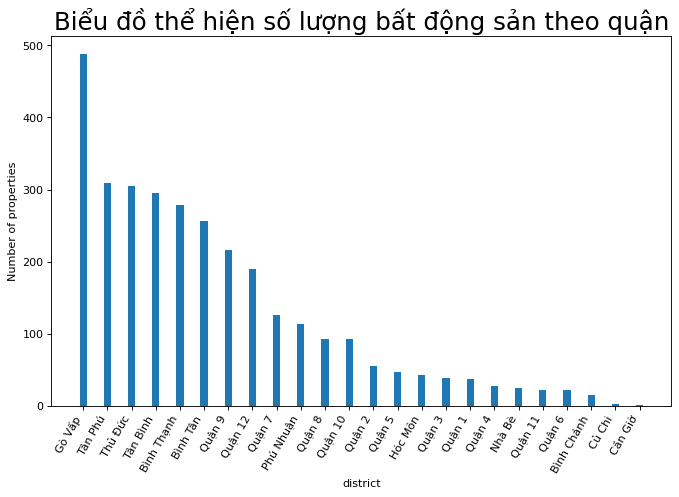

In [103]:
plt.figure(figsize=(10,6), dpi= 80)
plt.bar(value_counts.index, value_counts.values,width=0.3)
plt.xticks(rotation=60, horizontalalignment= 'right')
plt.title("Biểu đồ thể hiện số lượng bất động sản theo quận", fontsize=22)
plt.xlabel('district')
plt.ylabel('Number of properties')
plt.show()

<Axes: xlabel='Area'>

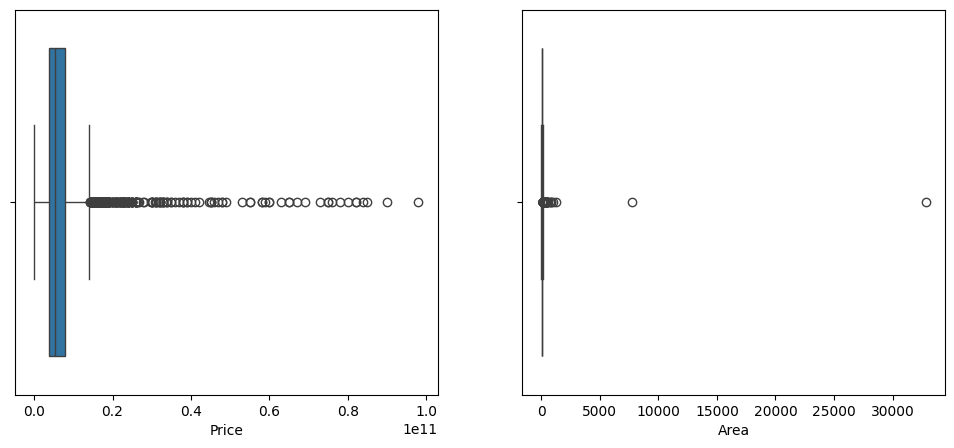

In [104]:
# Sự phân bố của giá nhà và diện tích của nhà
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x=df_test['Price'], ax=axes[0])
sns.boxplot(x=df_test['Area'], ax=axes[1])


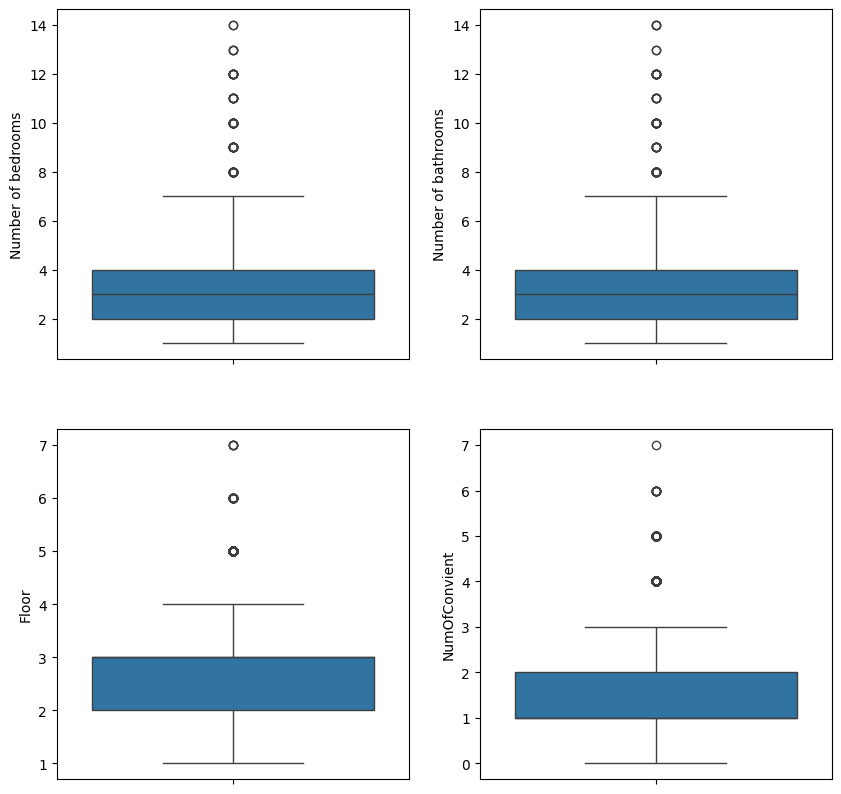

In [105]:
# Ta xem sự phân bố của các giá trị bedroom, bathroom, floor và Num Convenient
fig1, axes1 = plt.subplots(2, 2, figsize=(10, 10))

# Plot each boxplot on a different axis, vertically
sns.boxplot(y = df_test['Number of bedrooms'], ax=axes1[0][0])
sns.boxplot(y = df_test['Number of bathrooms'], ax=axes1[0][1])
sns.boxplot(y = df_test['Floor'], ax=axes1[1][0])
sns.boxplot(y = df_test['NumOfConvient'], ax=axes1[1][1])

plt.show()

Ta thấy các cột chưa nhiều oulier. Vì vậy ta sẽ xóa tất cả các outlier của tất cả các cột

In [106]:
import numpy as np
numeric_cols = df_test.select_dtypes(include=[np.number]).columns

Q1 = df_test[numeric_cols].quantile(0.25)
Q3 = df_test[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

df_test = df_test[~((df_test[numeric_cols] < (Q1 - 1.5 * IQR)) | (df_test[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

<Axes: xlabel='Area'>

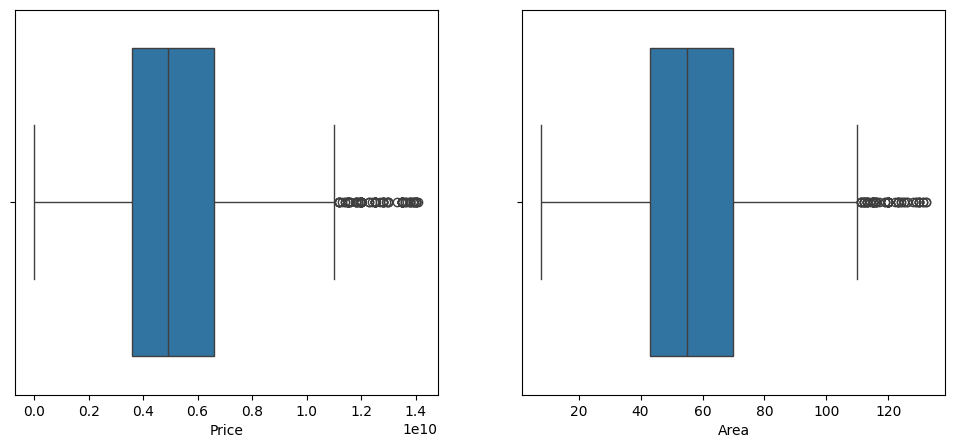

In [107]:
# Xem lại sự phân bố sau khi ta xóa đi outlier
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x=df_test['Price'], ax=axes[0])
sns.boxplot(x=df_test['Area'], ax=axes[1])

Text(0.5, 1.0, 'Histogram of Values with KDE')

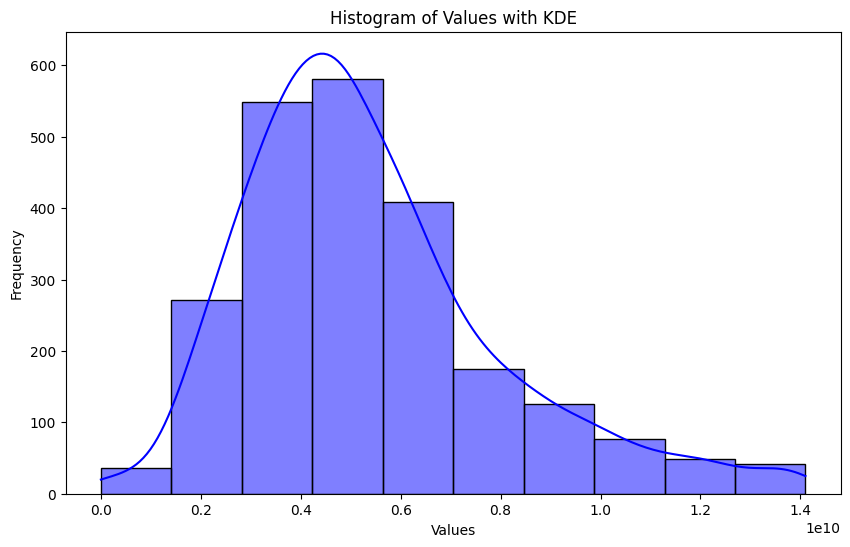

In [108]:
# Xe sự phân bố giá nhà bằng histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_test['Price'], bins=10, kde=True, color='blue')

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Values with KDE')

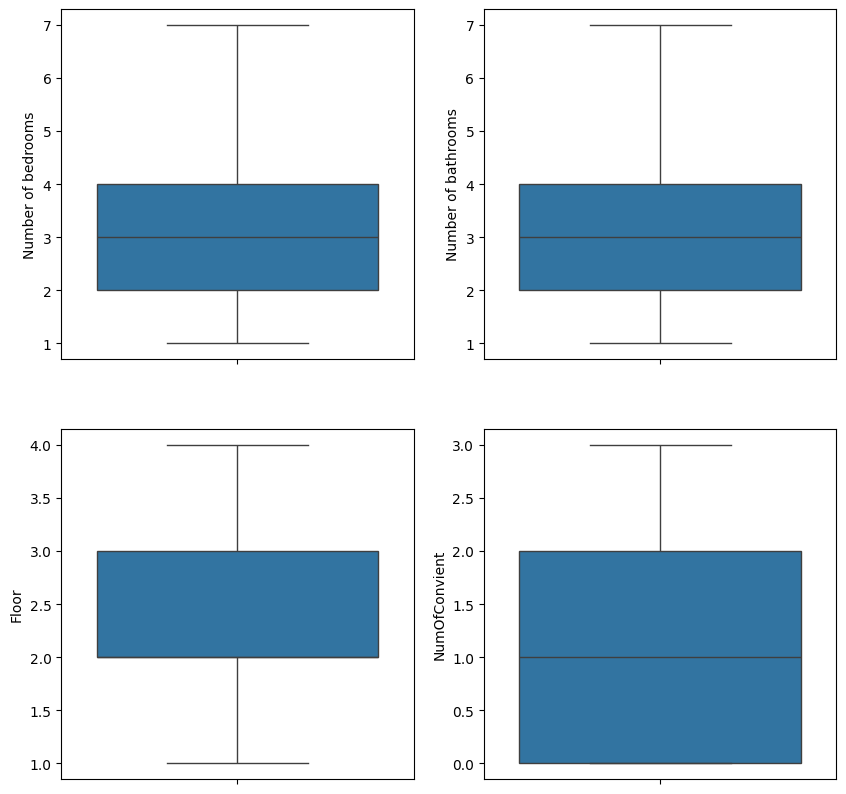

In [109]:
# Ta xem sự phân bố của các giá trị bedroom, bathroom, floor và Num Convenient sau khi xóa outlier
fig1, axes1 = plt.subplots(2, 2, figsize=(10, 10))

# Plot each boxplot on a different axis, vertically
sns.boxplot(y = df_test['Number of bedrooms'], ax=axes1[0][0])
sns.boxplot(y = df_test['Number of bathrooms'], ax=axes1[0][1])
sns.boxplot(y = df_test['Floor'], ax=axes1[1][0])
sns.boxplot(y = df_test['NumOfConvient'], ax=axes1[1][1])

plt.show()

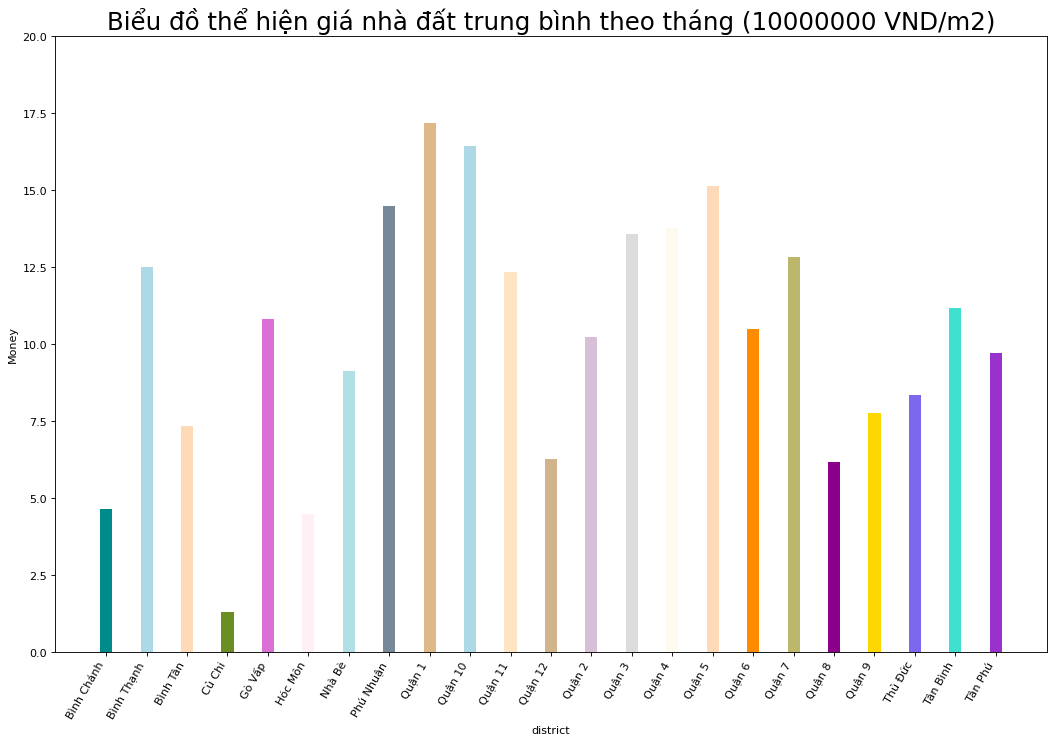

In [110]:
#Gia nha dat trung binh theo quan
import random

def newprice(row):
  return row['Price']/(row['Area']*10000000) #10000000VND/m2

dftmp = df_test.copy()
dftmp['pricePerSquare'] = dftmp.apply(newprice, axis = 1)
df2 = dftmp.groupby('district')['pricePerSquare'].mean().reset_index(name='Money')
df2['Money'] = df2['Money'].apply(lambda x : round(x, 2))
n = df2['district'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
all_colors.remove('white')
all_colors.remove('black')
random.seed(100)
c = random.choices(all_colors, k=n)

plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df2['district'], df2['Money'], color=c, width=0.3)

plt.xticks(rotation=60, horizontalalignment= 'right')
plt.title("Biểu đồ thể hiện giá nhà đất trung bình theo Area (10000000 VND/m2)", fontsize=22)
plt.xlabel('district')
plt.ylabel('Money')
plt.ylim(0,20)
plt.show()

['darkcyan', 'lightblue', 'peachpuff', 'olivedrab', 'orchid', 'lavenderblush', 'powderblue', 'lightslategray']


<ipython-input-111-392ffd58d5ed>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(df3['Number of bedrooms'], rotation=60, horizontalalignment= 'right')


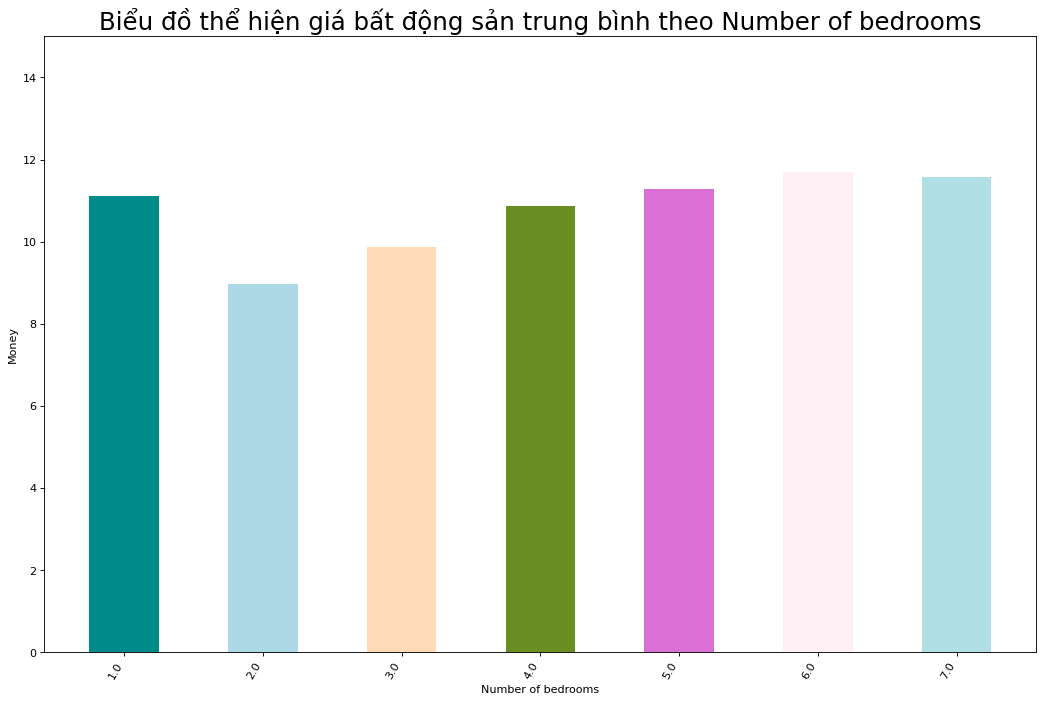

In [111]:
#Gia trung binh theo so luong bedroom

df3 = dftmp.groupby('Number of bedrooms')['pricePerSquare'].mean().reset_index(name='Money')
df3['Money'] = df3['Money'].apply(lambda x : round(x, 2))
df3['Number of bedrooms'] = df3['Number of bedrooms'].apply(lambda x : str(x))
n = df3['Number of bedrooms'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
all_colors.remove('white')
all_colors.remove('black')
random.seed(100)
c = random.choices(all_colors, k=n)
print(c)

plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df3['Number of bedrooms'], df3['Money'], color=c, width=0.5)

plt.gca().set_xticklabels(df3['Number of bedrooms'], rotation=60, horizontalalignment= 'right')
plt.title("Biểu đồ thể hiện giá bất động sản trung bình theo Number of bedrooms", fontsize=22)
plt.ylim(0,15)
plt.xlabel('Number of bedrooms')
plt.ylabel('Money')
plt.show()

['darkblue', 'lemonchiffon', 'peachpuff', 'olive', 'orchid', 'lavender', 'powderblue', 'lightslategray']


<ipython-input-112-dbb13b41e0cf>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(df4['Number of bathrooms'], rotation=60, horizontalalignment= 'right')


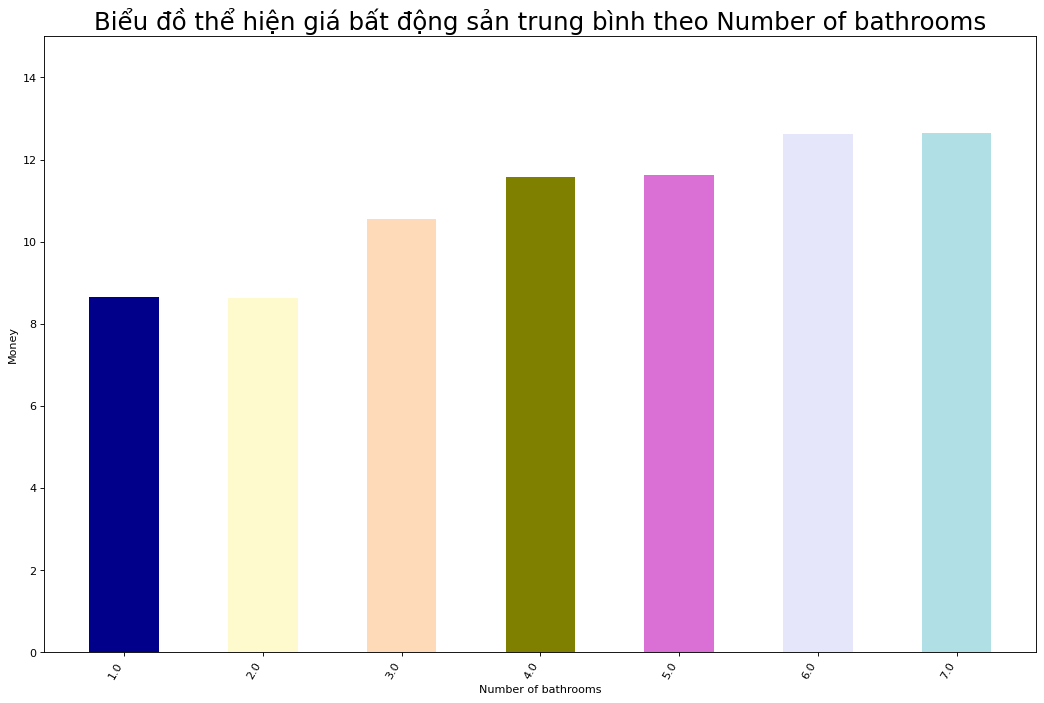

In [112]:
#Gia trung binh theo so luong bathroom

df4 = dftmp.groupby('Number of bathrooms')['pricePerSquare'].mean().reset_index(name='Money')
df4['Money'] = df4['Money'].apply(lambda x : round(x, 2))
df4['Number of bathrooms'] = df4['Number of bathrooms'].apply(lambda x : str(x))
n = df4['Number of bathrooms'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
all_colors.remove('white')
random.seed(100)
c = random.choices(all_colors, k=n)
print(c)

plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df4['Number of bathrooms'], df4['Money'], color=c, width=0.5)

plt.gca().set_xticklabels(df4['Number of bathrooms'], rotation=60, horizontalalignment= 'right')
plt.title("Biểu đồ thể hiện giá bất động sản trung bình theo Number of bathrooms", fontsize=22)
plt.ylim(0,15)
plt.xlabel('Number of bathrooms')
plt.ylabel('Money')
plt.show()

['darkblue', 'lemonchiffon', 'peachpuff', 'olive', 'orchid']


<ipython-input-113-db4b4bf97ef1>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(df5['Floor'], rotation=60, horizontalalignment= 'right')


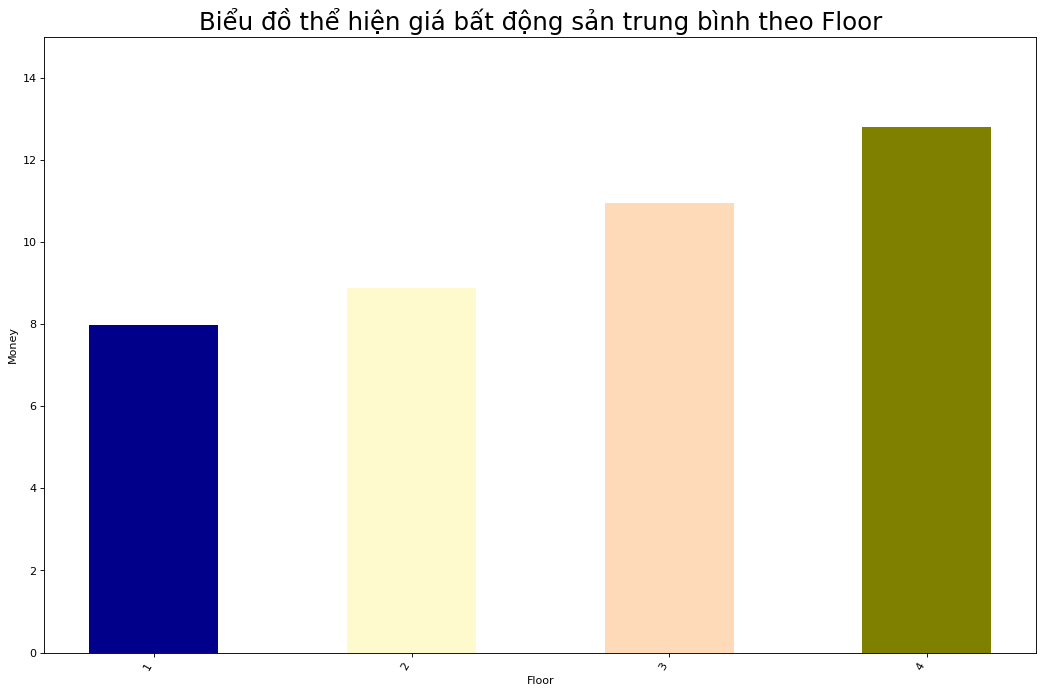

In [113]:
#Gia trung binh theo floor

df5 = dftmp.groupby('Floor')['pricePerSquare'].mean().reset_index(name='Money')
df5['Money'] = df5['Money'].apply(lambda x : round(x, 2))
df5['Floor'] = df5['Floor'].apply(lambda x : str(x))
n = df5['Floor'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
all_colors.remove('white')
random.seed(100)
c = random.choices(all_colors, k=n)
print(c)

plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df5['Floor'], df5['Money'], color=c, width=0.5)

plt.gca().set_xticklabels(df5['Floor'], rotation=60, horizontalalignment= 'right')
plt.title("Biểu đồ thể hiện giá bất động sản trung bình theo Floor", fontsize=22)
plt.ylim(0,15)
plt.xlabel('Floor')
plt.ylabel('Money')
plt.show()

<Figure size 480x320 with 0 Axes>

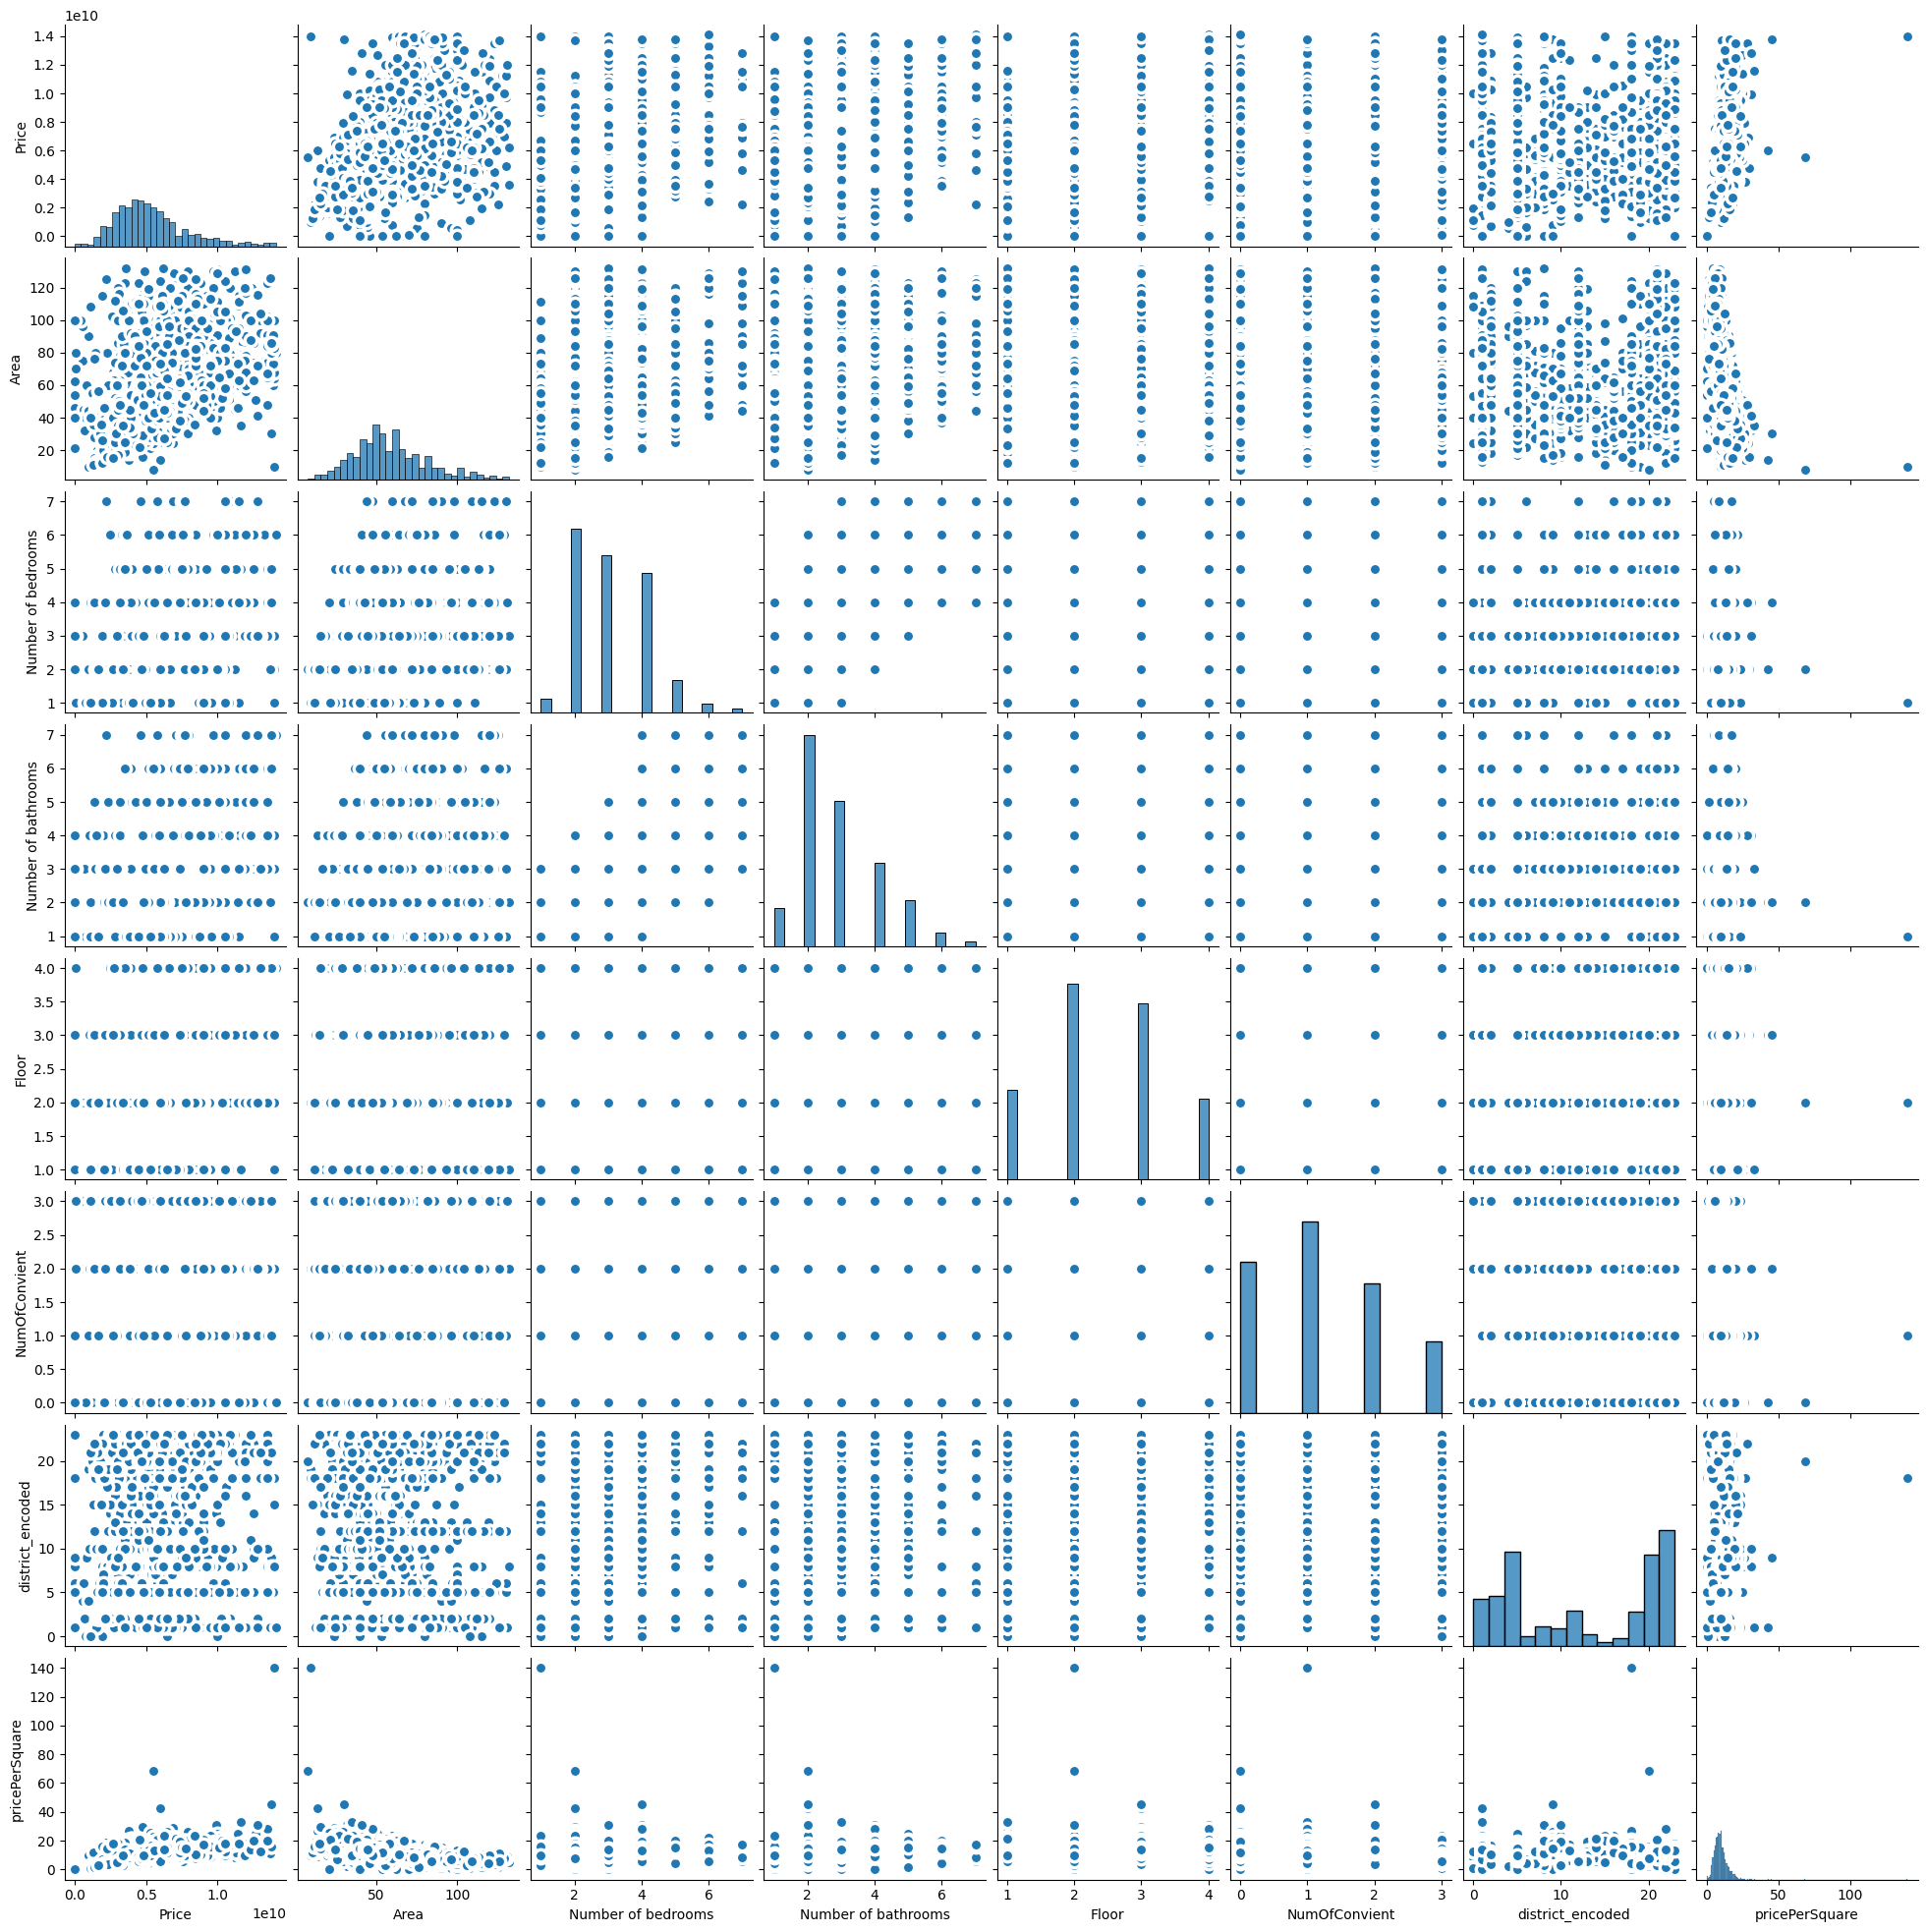

In [114]:
plt.figure(figsize=(6,4), dpi= 80)
sns.pairplot(dftmp, kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

In [128]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2314 entries, 0 to 2313
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                2314 non-null   float64
 1   district             2314 non-null   object 
 2   Area                 2314 non-null   float64
 3   Address              2314 non-null   object 
 4   Number of bedrooms   2314 non-null   float64
 5   Number of bathrooms  2314 non-null   float64
 6   New_content          2314 non-null   object 
 7   Floor                2314 non-null   int64  
 8   NumOfConvient        2314 non-null   int64  
 9   district_encoded     2314 non-null   int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 180.9+ KB


In [116]:
# Chinh lai index
df_test.reset_index(drop=True, inplace=True)

In [127]:
df_test.head()

,Price,district,Area,Address,Number of bedrooms,Number of bathrooms,New_content,Floor,NumOfConvient,district_encoded
0,3.400000e+09,Quận 8,110.0,"Nhà Chính chủ hẻm taxi Mễ Cốc, P15, Q8.",4.0,3.0,"Nhà Chính chủ hẻm taxi Mễ Cốc, P15, Q8. Giá 3....",3,0,19
1,9.390000e+09,Bình Thạnh,80.0,"BÌNH THẠNH , HCM",5.0,5.0,BÁN NHÀ BÌNH THẠNH 80M2 - 5PN 5WC - DÒNG TIỀN ...,2,0,1
2,8.300000e+09,Quận 9,80.0,"Đường Trường Lưu, Phường Long Trường, Q9",4.0,5.0,"Cần bán gấp nhà 1 trệt 2 lầu 80m2 5x16, đường ...",3,1,20
3,3.350000e+09,Tân Phú,50.0,"Trường Chinh, Tây Thạnh, Tân Phú, Hồ Chí Minh,...",2.0,2.0,"BÁN NHÀ 2 TẦNG RẺ NHẤT TÂN PHÚ,5.2Mx9.6M, KẾ C...",2,0,23
4,9.900000e+09,Gò Vấp,94.0,Bùi Quang Là,3.0,4.0,"Nhà Phường 12 Gò Vấp sát mặt tiền, hẻm 6m, sổ ...",3,1,5


--- Sau khi xóa các outlier và xem xét về sự phân phố, tập dataFrame df_test là tập dữ liệu cuối cùng chúng em dùng để chạy Model. Ở datafraem này có shape là (2314,10)

In [126]:
df_test.to_csv('Model.csv', index=False)

# Heatmap density


Data

In [118]:
data = df_test.copy()

1. Visualize a heatmap based on the address of the listed house using kernel density estimation at a certain time.  


In [133]:
df_heatmap = data['Address'].iloc[:200].to_frame()

In [134]:
df_heatmap.shape

(200, 1)

In [135]:
import time
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeopyError

def fetch_coordinates(address, user_agent="hofoNam24/1.0"):
    locator = Nominatim(user_agent=user_agent)
    try:
        loc = locator.geocode(address)
        if loc:
            return loc.latitude, loc.longitude
        time.sleep(1)  # Adhere to rate limit
    except GeocoderTimedOut:
        time.sleep(1)  # Retry once after a timeout
        return fetch_coordinates(address, user_agent)
    except GeopyError as error:
        print(f"Error fetching coordinates: {error}")
        return None, None
    return None, None




In [136]:
df_heatmap[['latitude', 'longitude']] = df_heatmap['Address'].apply(
    lambda addr: fetch_coordinates(addr)
).apply(pd.Series)

Error fetching coordinates: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=71%2F43+&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))


Error fetching coordinates: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=s%E1%BB%91+15+b%C3%ACnh+h%C6%B0ng+h%C3%B2a&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))


In [138]:
import pandas as pd
import folium
from folium import plugins

# Giả sử df_10_rows là DataFrame của bạn chứa dữ liệu vị trí
# Ví dụ về phạm vi tọa độ cho TP. Hồ Chí Minh (các giá trị này chỉ mang tính chất minh họa và cần được điều chỉnh cho phù hợp)
min_lat, max_lat = 10.36, 11
min_lon, max_lon = 106.36, 106.84

# Lọc dữ liệu để chỉ giữ lại các điểm nằm trong TP. Hồ Chí Minh
filtered_data = df_heatmap[(df_heatmap['latitude'] >= min_lat) & (df_heatmap['latitude'] <= max_lat) &
                           (df_heatmap['longitude'] >= min_lon) & (df_heatmap['longitude'] <= max_lon)]

# Chuyển dữ liệu đã lọc thành danh sách cho heatmap
data_fil = filtered_data[['latitude', 'longitude']].values.tolist()

# Tạo bản đồ với vị trí trung tâm là TP. Hồ Chí Minh
map_hcm = folium.Map(location=[10.776889, 106.700806], zoom_start=12)

# Tạo và thêm lớp heatmap
heatmap_layer = plugins.HeatMap(data_fil)
map_hcm.add_child(heatmap_layer)

# Hiển thị bản đồ
map_hcm